In [18]:
!pip install pandas
import pandas as pd
# Example: Reading data from a CSV file
df = pd.read_csv('Walmart Data Analysis and Forcasting.csv')
# Display the first few rows of the DataFrame
print(df.head())
!pip install matplotlib
import matplotlib.pyplot as plt
!pip install numpy

import numpy as np

!pip install scipy
from scipy import stats, optimize


   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [6]:

# Load your Walmart dataset into a Pandas DataFrame

df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


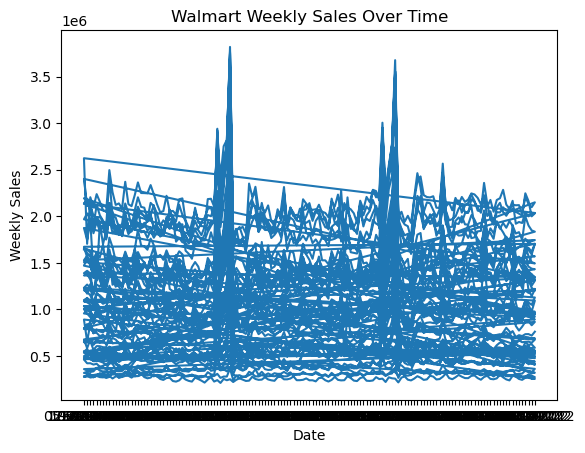

In [9]:
import matplotlib.pyplot as plt

# Example: Plotting sales over time
plt.plot(df['Date'],df['Weekly_Sales'])
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Walmart Weekly Sales Over Time')
plt.show()


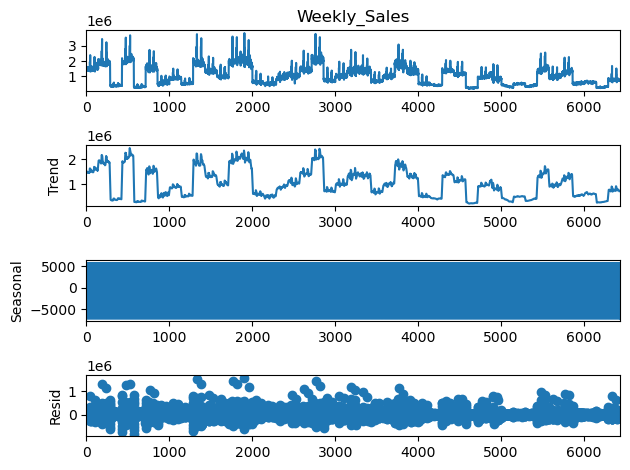

In [10]:
# Example: Time series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Weekly_Sales'], model='additive', period=12)
result.plot()
plt.show()


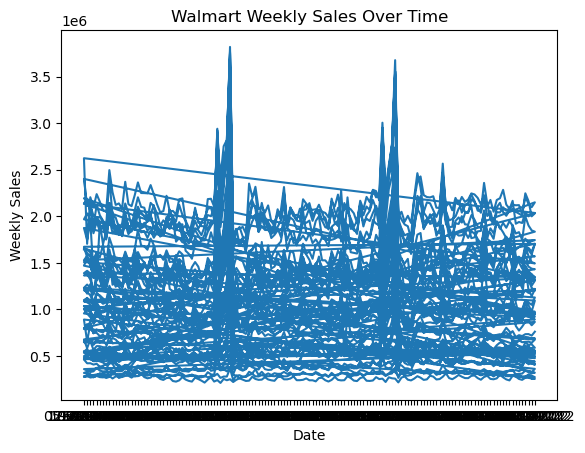

Mean Squared Error: 274455221280.6605
Predicted Weekly Sales: 1277647.6432383177


In [13]:
# Example: Using scikit-learn for forecasting
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your Walmart dataset into a Pandas DataFrame


# Visualize Weekly Sales over time
plt.plot(df['Date'], df['Weekly_Sales'])
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Walmart Weekly Sales Over Time')
plt.show()

# Prepare data for training
X = df[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = df['Weekly_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Example: Predicting Weekly Sales for a new data point
new_data_point = pd.DataFrame([[5, 1, 75.0, 3.50, 220.0, 7.5]], columns=['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'])
predicted_sales = model.predict(new_data_point)
print(f'Predicted Weekly Sales: {predicted_sales[0]}')


Mean Squared Error: 15849686893.774778


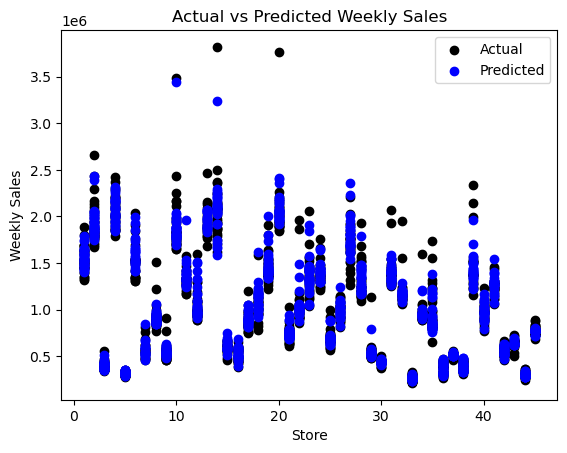

In [17]:

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Drop 'Date' column and other unnecessary columns
walmart_data = df.drop(['Date'], axis=1)

# Data Preprocessing: Standardize numerical features

numerical_features = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day']


# Prepare data for training
X = df[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day']]
y =df['Weekly_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Visualize predictions vs actual values
plt.scatter(X_test['Store'], y_test, color='black', label='Actual')
plt.scatter(X_test['Store'], predictions, color='blue', label='Predicted')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.title('Actual vs Predicted Weekly Sales')
plt.legend()
plt.show()




In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Example: Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Example: Random Forest
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# Example: Support Vector Machine
model_svm = SVR()
model_svm.fit(X_train, y_train)

# Example: Neural Network
model_nn = MLPRegressor()
model_nn.fit(X_train, y_train)


C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, r2

mse_lr, r2_lr = evaluate_model(model_lr, X_test, y_test)
mse_rf, r2_rf = evaluate_model(model_rf, X_test, y_test)
mse_svm, r2_svm = evaluate_model(model_svm, X_test, y_test)
mse_nn, r2_nn = evaluate_model(model_nn, X_test, y_test)

print(f"Linear Regression - MSE: {mse_lr}, R-squared: {r2_lr}")
print(f"Random Forest - MSE: {mse_rf}, R-squared: {r2_rf}")
print(f"SVM - MSE: {mse_svm}, R-squared: {r2_svm}")
print(f"Neural Network - MSE: {mse_nn}, R-squared: {r2_nn}")


Linear Regression - MSE: 272920249049.84436, R-squared: 0.15282824143704066
Random Forest - MSE: 16141970131.827864, R-squared: 0.9498937097160796
SVM - MSE: 331329613230.8652, R-squared: -0.0284802688037753
Neural Network - MSE: 325541411882.3656, R-squared: -0.010513112711852957
